# Exploration des données


## 1. Importation des données et configuration du data set


In [1]:
import sys
sys.path.insert(0, '/home/apprenant/PycharmProjects/taxi_traffic/')
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# On charge le dataset
df = pd.read_csv('../data/train.csv')

## 2. Nettoyage des données

In [3]:
round(df.describe())

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0,1458644.0
mean,2.0,2.0,-74.0,41.0,-74.0,41.0,959.0
std,0.0,1.0,0.0,0.0,0.0,0.0,5237.0
min,1.0,0.0,-122.0,34.0,-122.0,32.0,1.0
25%,1.0,1.0,-74.0,41.0,-74.0,41.0,397.0
50%,2.0,1.0,-74.0,41.0,-74.0,41.0,662.0
75%,2.0,2.0,-74.0,41.0,-74.0,41.0,1075.0
max,2.0,9.0,-61.0,52.0,-61.0,44.0,3526282.0


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.shape

(1458644, 11)

Il y 1,458,644 lignes et 11 colonnes :
id : identifiant unique de chaque course
vendor_id : un code qui indique le fournisseur associé à la donnée de la course
pickup_datetime : date et heure du départ
dropoff_datetime : date et heure de l'arrivée
passenger_count : le nombre de passagers dans le véhicule. Donnée renseignée par le chauffeur.
pickup_longitude, pickup_latitude : coordonnées au départ
dropoff_longitude, dropoff_latitude : coordonnées à l'arrivée
store_and_fwd_flag - Cet indicateur indique si la donnée de la course a été stockée dans la mémoire du véhicule parce qu'il n'était pas
connecté ou si elle a été envoyée en temps réel. (Y=stockée, N=en temps réel)
trip_duration : durée de la course en secondes

Observations : il semble y avoir 2 fournisseurs identifiée par les chiffres 1 et 2. La moyenne du nombre de passagers est de 2. Le minimum est de 0 et le maximum est de 9, ce qui semble curieux mais n'est pas une donnée centrale de notre étude.

La longitude minimale (-122) correspond à une adresse située sur la côte ouest des États-Unis. Ce qui correspond à une valeur extrême mais pas impossible.

La longitude maximale (-61) correspond à une seule valeur (id: 804402)





In [6]:
df.loc[df['pickup_longitude'] > -62.0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
804402,id1974018,1,2016-01-22 16:52:09,2016-01-22 16:58:18,2,-61.335529,37.851051,-61.335529,37.851051,N,369


dont les coordonnées indiquent un emplacement non valide (océan Atlantique).
La latitude maximale (52) nous emmène au Canada.

La moyenne de la durée du trajet et de 959 secondes, ce qui fait environ 16 minutes. La durée minimale est de 1 seconde, et la durée
maximale est de 3526282 secondes soit 41 jours. Nous prêterons attention aux valeurs extrêmes.


In [7]:
print("Nombre de lignes dupliquées")
print(df.duplicated().value_counts())
print("\n" + "Nombre de valeurs manquantes")
print(df.isnull().sum())

Nombre de lignes dupliquées
False    1458644
dtype: int64

Nombre de valeurs manquantes
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


Le jeu de données étant propre, je peux passer à l'étape suivante

In [8]:
df.pickup_datetime.dtype

dtype('O')

## 3. Exploration des données

In [9]:
df = pd.read_csv('../data/intermediate_train.csv')

In [10]:
df_sample = df

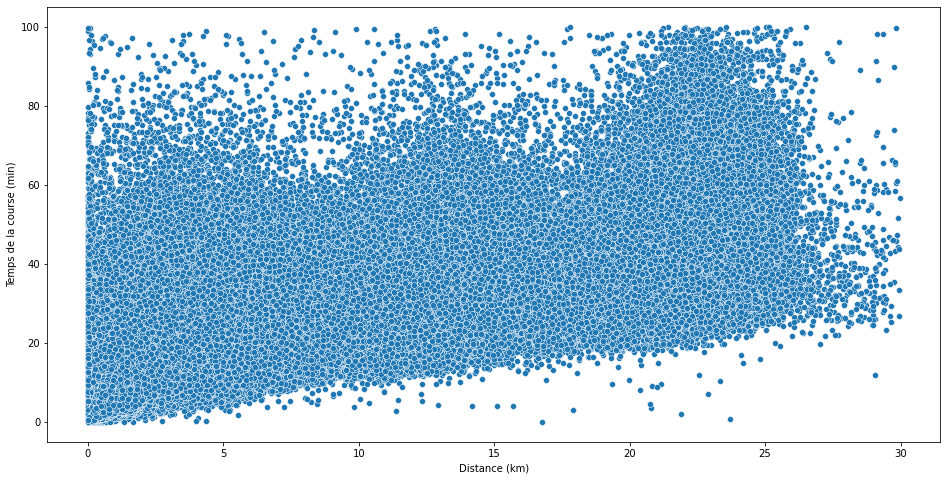

In [11]:
sns.scatterplot(x=df_sample['distance'], y=(df_sample['trip_duration'] / 60))
plt.xlabel('Distance (km)')
plt.ylabel('Temps de la course (min)')
fig = plt.gcf()

fig.set_size_inches(16,8)

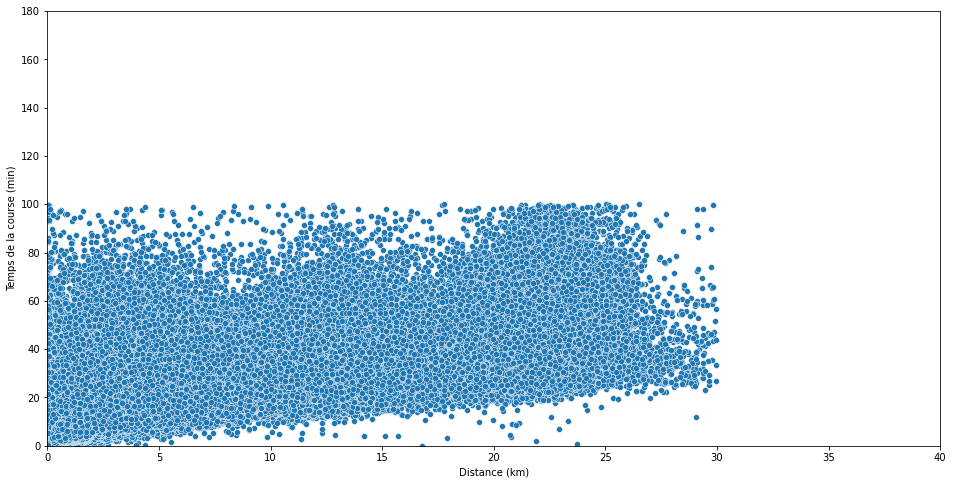

In [12]:
sns.scatterplot(x=df_sample['distance'], y=(df_sample['trip_duration'] / 60))
plt.xlim(0, 40)
plt.ylim(0, 180)
plt.xlabel('Distance (km)')
plt.ylabel('Temps de la course (min)')
fig = plt.gcf()

fig.set_size_inches(16,8)

## Visualisation des indicateurs

### Vitesse moyenne de chaque trajet

On va limiter les vitesses à celles inférieures à 80 km/h pour ne garder que les vitesses cohérentes. 

In [13]:
dft = df[df['speed']<80]

On peut maintenant tracer la distribution de la vitesse

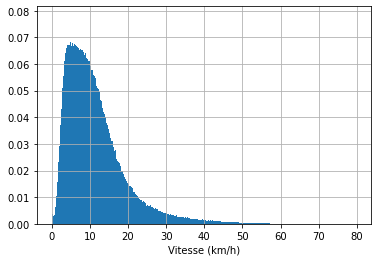

In [14]:
dft['speed'].hist(density=True,bins=1000)
plt.xlabel('Vitesse (km/h)');

On constate que la distribution de la vitesse ressemble à une loi normale. Sa queue de distribution est étalée vers la droite, cette courbe a donc une asymétrie positive. 

### Nombre de trajets effectués en fonction du jour de la semaine

In [15]:
df['pickup_datetime'].sort_values().head(1);

96266    2016-01-01 00:00:17
Name: pickup_datetime, dtype: object

In [16]:
df['pickup_datetime'].sort_values().tail(1);

499444    2016-06-30 23:59:39
Name: pickup_datetime, dtype: object

Les données sont collectées sur la période comprise entre le 01 janvier et le 30 juin 2016, ce qui correspond à exactement 26 semaines, 2016 étant une année bissextile. 

In [17]:
from src.d02_intermediate.intermediate import trip_count_by_weekday
weekdays = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

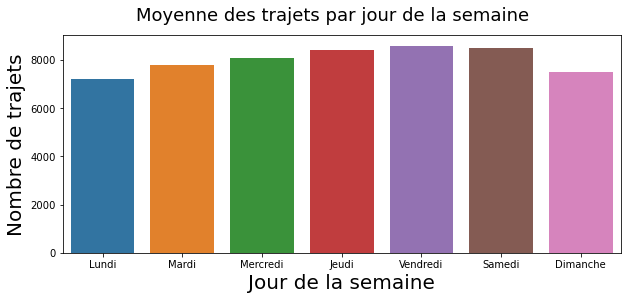

In [18]:
ax=sns.barplot(x=weekdays ,y=trip_count_by_weekday)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(10,4)
# Ajout du titre
fig.suptitle("Moyenne des trajets par jour de la semaine", fontsize=18)
# Ajout des labels pour les axes x et y
plt.xlabel("Jour de la semaine", fontsize=20);
plt.ylabel("Nombre de trajets", fontsize=20, rotation=90);

On constate que le lundi est le jour le plus calme. Le nombre de trajets augmente de jour en jour jusqu'au vendredi avec une très légère baisse le samedi. Le dimanche est presque aussi calme que le lundi.

### Nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h

In [19]:
from src.d02_intermediate.intermediate import trip_count_by_timeslot

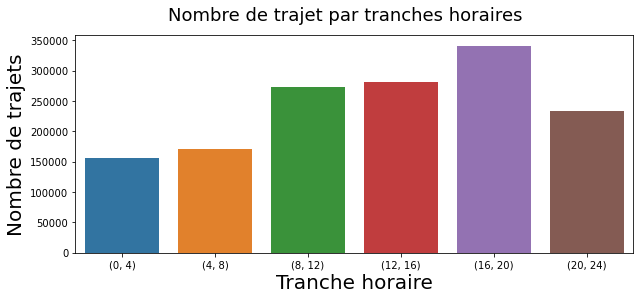

In [22]:
x = trip_count_by_timeslot.index
y = trip_count_by_timeslot.values

ax=sns.barplot(x=x ,y=y)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(10,4)
# Ajout du titre
fig.suptitle("Nombre de trajet par tranches horaires", fontsize=18)
# Ajout des labels pour les axes x et y
plt.xlabel("Tranche horaire", fontsize=20);
plt.ylabel("Nombre de trajets", fontsize=20, rotation=90);

On constate que c'est en journée, de 8h à 20h, qu'il y a le plus grand nombre de trajets avec un pic de 16h à 20h. La nuit de minuit à 8h est la période la plus calme. 

### Distance parcourue par jour de la semaine

In [23]:
from src.d02_intermediate.intermediate import km_count_by_weekday

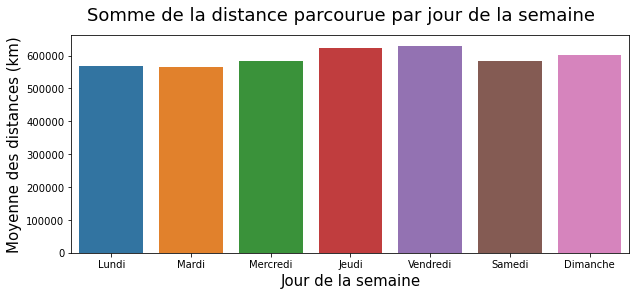

In [27]:
ax=sns.barplot(x=weekdays ,y=km_count_by_weekday)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(10,4)
# Ajout du titre
fig.suptitle("Somme de la distance parcourue par jour de la semaine", fontsize=18)
# Ajout des labels pour les axes x et y
plt.xlabel("Jour de la semaine", fontsize=15);
plt.ylabel("Moyenne des distances (km)", fontsize=15, rotation=90);

On constate que la distance totale parcourue par jour est la plus élevée le jeudi et le vendredi. Le samedi et le mardi, la distance parcourue est plus faible que le reste de la semaine.

## 4. Choix du modèle de machine learning

Nous proposons de choisir un modèle de régression linéaire.


## 5. Préparation des données

### 5.a échantillonage

On effectue une régression linéaire, on peut donc garder l'ensemble des valeurs de la base. 

### 5.b Sélection de la variable cible et des variables explicatives

On effectue une régression linéaire sur un jeu de donnée qui a été nettoyé à cet effet. On peut utiliser tout le jeu de données

In [130]:
df_reg = df

On définit la variable cible

In [67]:
y = df_reg['trip_duration']

et notre variable explicative.

In [68]:
X = df_reg[['distance']]

## 6. Division du jeu de données en training/validation/testing sets

In [69]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)


## 7. Apprentissage sur le training set

### On implémente la regression linéaire

In [70]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

### On obtient ainsi les parmètres β1 et β0 de notre modèle

In [71]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
      .format(round(regr.coef_[0],2),round(regr.intercept_)))

print("\n")

print("On comprend donc que chaque course dure {} secondes auquel il faut ajouter {} secondes par kilomètre supplémentaire"
     .format(round(regr.intercept_),round(regr.coef_[0],2)))

Le coefficient β1 est égal à 112.69 tandis que l'intercept β0 est égal à 512


On comprend donc que chaque course dure 512 secondes auquel il faut ajouter 112.69 secondes par kilomètre supplémentaire


### On peut à présent réaliser des prédictions

In [72]:
x_to_predict = 5
x_df =  pd.DataFrame({'surface': [x_to_predict]})

print("Selon le modèle, une course de {} km dure {} minutes"
      .format(x_to_predict, round(regr.predict(x_df)[0]/60)))

print("\n")

print ("On remarque que {} * {} + {} = {}"
       .format(x_to_predict,round(regr.coef_[0],2),round(regr.intercept_),
               x_to_predict*round(regr.coef_[0],2)+round(regr.intercept_)))

Selon le modèle, une course de 5 km dure 18 minutes


On remarque que 5 * 112.69 + 512 = 1075.45


### On peut représenter notre modèle linéaire


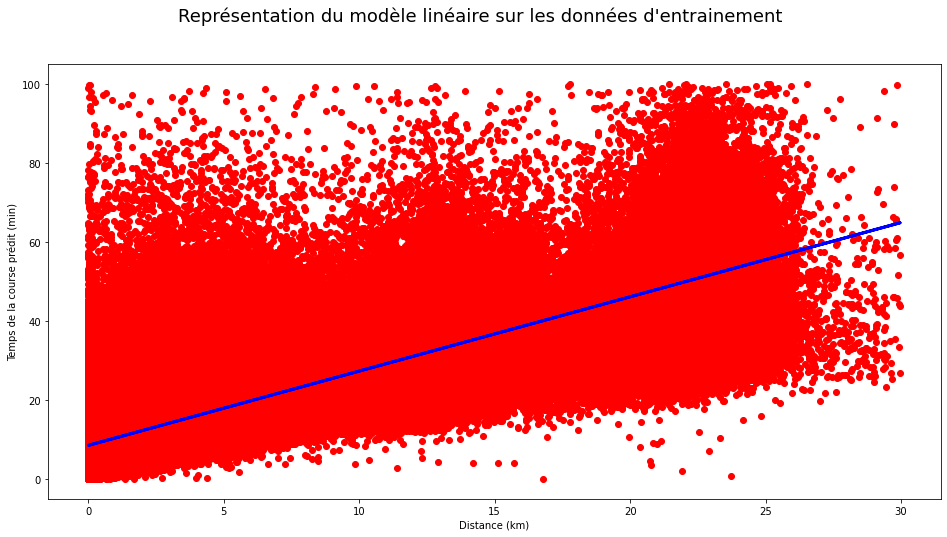

In [73]:
ytrainpred = regr.predict(xtrain)

# Plot outputs
plt.scatter(xtrain, ytrain/60,  color='red')
plt.plot(xtrain, ytrainpred/60, color='blue', linewidth=3)
plt.xlabel('Distance (km)')
plt.ylabel('Temps de la course prédit (min)')
fig = plt.gcf()
fig.set_size_inches(16,8)
fig.suptitle("Représentation du modèle linéaire sur les données d'entrainement", fontsize=18)
plt.show()

## 8. Evaluation du modèle sur le testing set

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

### Evaluation à partir du R2

In [75]:
ytrainpred = regr.predict(xtrain)
ytestpred = regr.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(round(r2_score(ytrain, ytrainpred),3), round(r2_score(ytest, ytestpred),3)))

Pour les données d'entrainement le R2 vaut 0.513 alors que pour les données de test, il est de 0.518


On constate que le modèle est robuste. En effet, les coefficients de détermination ont des valeurs proches. On constate cependant que ce coefficient est plutôt faible, ce qui est peu satisfaisant. Pour avoir une prédiction plus précise, il faudra ajouter d'autres variables explicatives. 

###  Evaluation à partir du RMSE

In [76]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 451.736 alors que pour les données de test, il est de 449.539


Comme pour le coefficient de détermination, on constate que le modèle est plutôt robuste. 

### Evaluation graphique

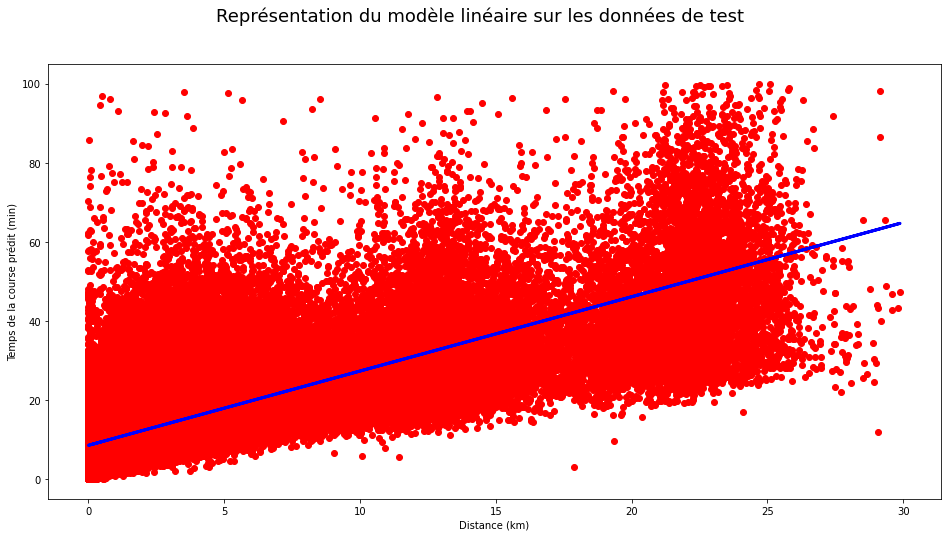

In [77]:
# Plot outputs
plt.scatter(xtest, ytest/60,  color='red')
plt.plot(xtest, ytestpred/60, color='blue', linewidth=3)
plt.xlabel('Distance (km)')
plt.ylabel('Temps de la course prédit (min)')
fig = plt.gcf()
fig.set_size_inches(16,8)
fig.suptitle("Représentation du modèle linéaire sur les données de test", fontsize=18)
plt.show()
plt.show()

On constate que la majorité des points se regroupent autour de la droite mais que les écarts sont plutôt élevés. On constate également que les valeurs sont fortement dispersées. Par exemple, un trajet de 23 km peut durer entre 18 et 60 minutes. Notre modèle estime qu'il faut 40 minutes pour parcourir ces 23 km. Il faudrait donc déterminer d'autres variables explicatives pour ajuster le modèle.  

### Conclusion 

Notre modèle de régression linéaire avec une seule variable explicative est limitée. Pour l'améliorer, on pourra ajouter d'autres variables explicatives. Il faut aussi prendre en compte le fait que la distance est calculée à vol d'oiseau, on ne tient pas compte du parcours. 